In [1]:
class Homeo(SageObject):
    def __init__(self, *args, **kwargs):
        if len(args) == 1:
            args = args[0]
        elif len(args) == 2:
            args = args[0] + args[1]
        if len(args) == 4:
            assert(sum(args[0:2])<kwargs['length'])
            args = args[0:2] + (kwargs['length']-sum(args[0:2]),) + args[2:4]
        if len(args) == 5:
            if sum(args[0:3]) < sum(args[3:5]):
                raise ValueError('Upper length too long : %f < %f'%(sum(args[0:3]), sum(args[3:5])))
            args = args + (sum(args[0:3]) - sum(args[3:5]),)
        if len(args) == 6:
            h, b = args[0:3], args[3:6]

        if any(x<0 for x in (h+b)):
            raise ValueError('Cannot define a negative length')
        if abs(sum(h) - sum(b)) > 1e-6:
            raise ValueError('Upper length %f dans lower length %f are different'%(sum(h),sum(b)))

        l = sum(h)
        self.h, self.b = h, b
        self.length = l

        alpha = [b[0]/h[0],b[1]/h[1],b[2]/h[2]]
        position = [0, h[0], h[0]+h[1], l]
        translation = [b[2], b[2]+b[0], 0]
        
        def interval(x):
            if x>=position[0] and x < position[1]:
                return(0)
            if x>=position[1] and x < position[2]:
                return(1)
            if x>=position[2] and x < position[3]:
                return(2)
            else:
                return -1

        def f(x):
            i = interval(x)
            if i < 0 : return 0
            return(RDF(translation[i] + alpha[i]*(x-position[i])))
        
        def mul(x):
            i = interval(x)
            if i < 0 : return 0
            return(alpha[i])
        
        self.interval = interval
        self.length = l
        self.h, self.b = h,b
        self.f = f
        self.mul = mul
    
    def closed_leaf(self,n,max=200):
        r = random()
        for _ in xrange(n):
            r = self.f(r)
        r_init = r
        leaf = [r_init]
        r = self.f(r_init)
        count = 0
        while abs(r - r_init)> self.length/1e6*max and count < max:
            leaf.append(r)
            r = self.f(r)
            count += 1
        if count >= max:
            leaf = []
            #print "No closed leaf"
        return(leaf)
    
    def nb_rotation(self, leaf):
        count = 0
        if not leaf: return 0
        for x in leaf:
            if self.interval(x)==2:
                count += 1
        return(count/len(leaf))
    
    def plot(self, s=2, rauzy=False, length=False, right=True, save_name=None):
        g = Graphics()
        color = [.3, .7, .95]
        alpha=.8
        fontsize=20
        for i in range(2):
            x = 0
            for l in range(3):
                step = self.h[l] if not(i) else self.b[(l+2)%3]
                g += line2d([[x,1-i], [x+step-.03, 1-i]], hue=color[l if i else (l+1) %3], alpha=alpha, thickness=10)
                x += step
        g.show(axes=False, figsize=(10,2))

In [2]:
ex2 = Homeo(pi, sqrt(3), 1, e, length=6)

In [4]:
exp = [Homeo(x,y,2/3,2/3,length=2) for x in srange(.1, .9, .01) for y in srange(.1, .9, .01)]
#leafs = [(hom.h[0],hom.h[1],hom.closed_leaf(100)) for hom in exp]
#len_leafs = [(hom.h[0],hom.h[1],hom.nb_rotation((hom.closed_leaf(100)))) for hom in exp]

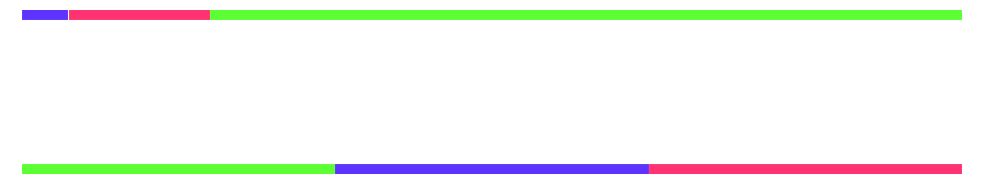

In [77]:
h1 = Homeo(0.1, 0.3, 2/3,2/3, length=2)
print 
h1.plot()

In [10]:
print h1.h
print h1.b

(0.100000000000000, 0.300000000000000, 1.60000000000000)
(2/3, 2/3, 0.666666666666667)


In [4]:
h1.nb_rotation(h1.closed_leaf(100))

3/5

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM

fig = plt.figure()

xedges = srange(.1, .9, .01)
yedges = srange(.1, .9, .01)
Z = matrix(len(xedges),len(yedges), [z for (x,y,z) in len_leafs])

plt.pcolormesh(xedges, yedges, Z, cmap=CM.RdBu_r)

plt.colorbar()
plt.show()
plt.savefig('test.png')

In [5]:
exp2 = [Homeo(x,y,2/3,2/3,length=2) for x in srange(.1, .6, .001) for y in srange(.1, .3, .001)]
len_leafs2 = [(hom.h[0],hom.h[1],hom.nb_rotation((hom.closed_leaf(200,max=50)))) for hom in exp2]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM

fig = plt.figure()

xedges = srange(.1, .6, .001)
yedges = srange(.1, .3, .001)
Z = matrix(len(yedges), len(xedges), [z for (x,y,z) in len_leafs2])

plt.pcolormesh(xedges, yedges, Z, cmap=CM.RdBu_r)

plt.colorbar()
plt.show()
plt.savefig('test2.png')

In [ ]:
points(len_leafs2)

In [5]:
exp3 = [Homeo(x,y,2/3,2/3,length=2) for x in srange(.1, .9, .001) for y in srange(.1, .9, .001)]
#leafs = [(hom.h[0],hom.h[1],hom.closed_leaf(100)) for hom in exp]
len_leafs3 = [(hom.h[0],hom.h[1],hom.nb_rotation((hom.closed_leaf(500)))) for hom in exp3]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM

fig = plt.figure()

xedges = srange(.1, .9, .001)
yedges = srange(.1, .9, .001)
Z = matrix(len(xedges),len(yedges), [z for (x,y,z) in len_leafs3])

plt.pcolormesh(xedges, yedges, Z, cmap=CM.RdBu_r)

plt.colorbar()
plt.show()
plt.savefig('test3.png')

In [15]:
exp4 = [Homeo((2-x)/2-y,(2-x)/2+y,x,(2-x)/2,(2-x)/2,x) for x in srange(.1, .9, .001) for y in srange(-.4, .4, .001)]
#leafs = [(hom.h[0],hom.h[1],hom.closed_leaf(100)) for hom in exp]
len_leafs4 = [(hom.h[0],hom.h[1],hom.nb_rotation((hom.closed_leaf(500)))) for hom in exp4]

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM

fig = plt.figure()

xedges = srange(-.4, .4, .001)
yedges = srange(.1, .9, .001)
Z = matrix(len(xedges),len(yedges), [z for (x,y,z) in len_leafs4])

plt.pcolormesh(xedges, yedges, Z, cmap=CM.RdBu_r)

plt.colorbar()
plt.show()
plt.savefig('test4.png')

In [18]:
x, y = .2, -.3
hom = Homeo((2-x)/2-y,(2-x)/2+y,x,(2-x)/2,(2-x)/2,x)
print hom.h, hom.b
print hom.closed_leaf(500)

(1.20000000000000, 0.600000000000000, 0.200000000000000) (0.900000000000000, 0.900000000000000, 0.200000000000000)
[0.7999999999999996]


In [ ]:
plot

In [2]:
exp5 = [Homeo(x,y,(x+y)/2,(x+y)/2,length=2) for x in srange(.1, .9, .001) for y in srange(.1, .9, .001)]
#leafs = [(hom.h[0],hom.h[1],hom.closed_leaf(100)) for hom in exp]
len_leafs5 = [(hom.h[0],hom.h[1],hom.nb_rotation((hom.closed_leaf(500)))) for hom in exp5]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM

fig = plt.figure()

xedges = srange(.1, .9, .001)
yedges = srange(.1, .9, .001)
Z = matrix(len(xedges),len(yedges), [z for (x,y,z) in len_leafs5])

plt.pcolormesh(xedges, yedges, Z, cmap=CM.RdBu_r)

plt.colorbar()
plt.show()
plt.savefig('test5.png')

In [20]:
la, lb, lc = var('la,lb,lc')
lap, lbp, lcp = var('lap,lbp,lcp')
solve([la+lb+lc==lap+lbp+lcp,lap==2*la, lbp==2*lb],[la,lb,lc])

[[la == 1/2*lap, lb == 1/2*lbp, lc == 1/2*lap + 1/2*lbp + lcp]]

In [12]:
solve?

In [23]:
solve([la+lb+lc == 1,2*la + 2*lb + lc/2==1], [la,lb,lc])

[[la == -r6 + 1/3, lb == r6, lc == (2/3)]]

In [47]:
def Fam(x):
    return Homeo(-x+1/3,x,-2*x+2/3,2*x,length=1)

In [48]:
def Fam_nb(x):
    h = Fam(x)
    return h.nb_rotation(h.closed_leaf(500))

In [72]:
def Fam(x):
    la = 3/2*x - 1
    lb = -5/2*x + 2
    return Homeo(la,lb,3*la,2*lb,length=1)
def Fam_nb(x):
    h = Fam(x)
    return h.nb_rotation(h.closed_leaf(500))

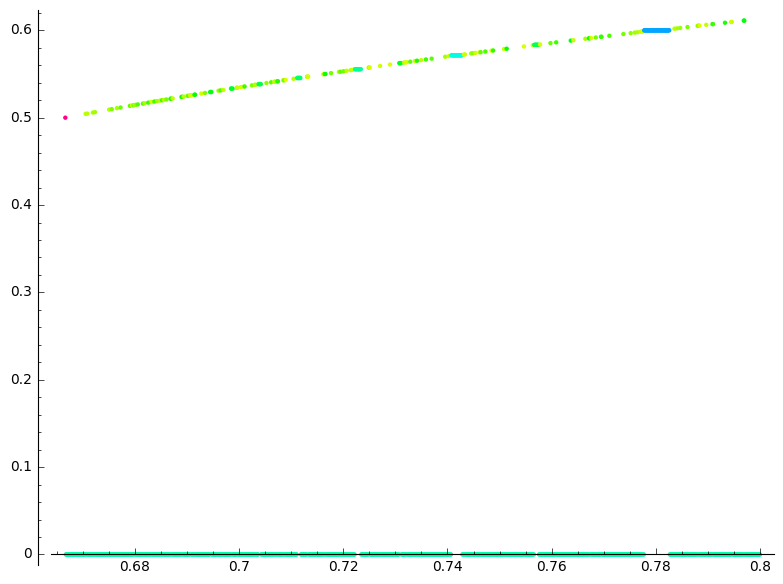

In [92]:
plt = point([])
for x in srange(2/3.,4/5,.0001):
    l = Fam_nb(x)
    plt += point([x,l],hue=1/log(1+l.denominator()))
plt.show()

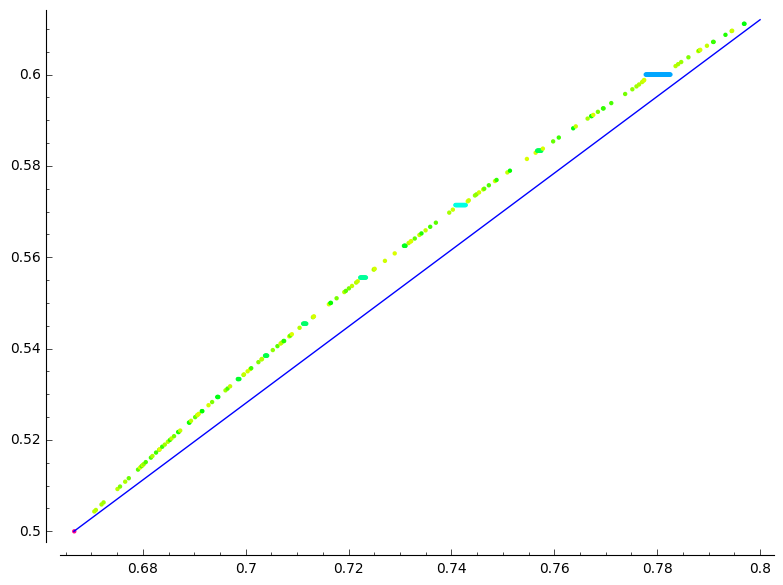

In [101]:
plt + line([[.6666,.5],[.8,.612]],ymin=.5)

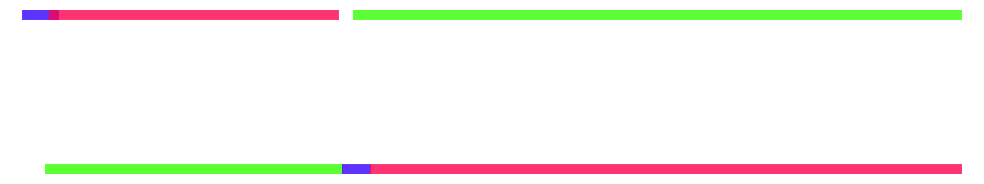

0.669666666666667


In [84]:
Fam(2/3.+.003).plot()
print 2/3.+.003

In [86]:
h = Fam(2/3.+.003)
print h.h, h.b
print h.closed_leaf(5000)

(0.00449999999999995, 0.325833333333333, 0.669666666666667) (0.0134999999999998, 0.651666666666667, 0.334833333333333)
[]


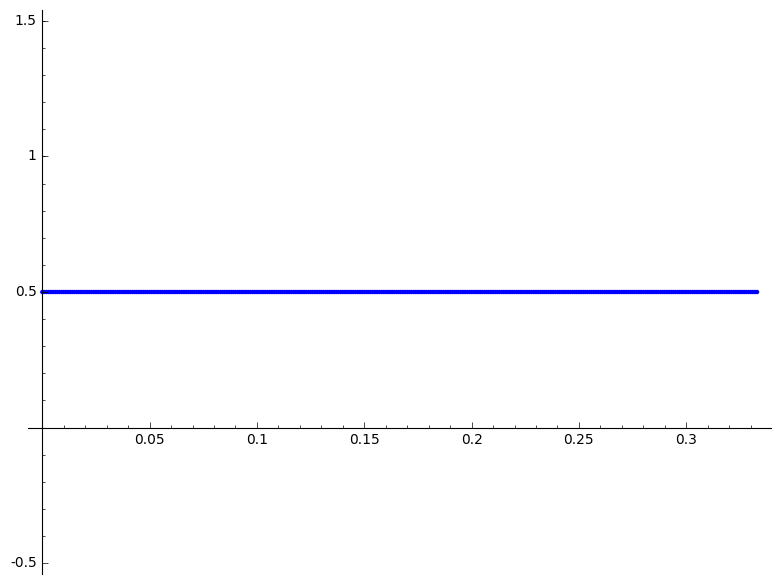

In [67]:
plt = []
for x in srange(0,1/3.,.001):
    plt.append([x,Fam_nb(x)])
point(plt)

In [102]:
def Fam_t(x,y):
    return Homeo(x,y,(x+y)/2,(x+y)/2,length=2)

In [105]:
def arnold(t):
    h= Fam_t(t,t+.1)
    return h.nb_rotation(h.closed_leaf(500))

In [108]:
arnold(.12)

5/6

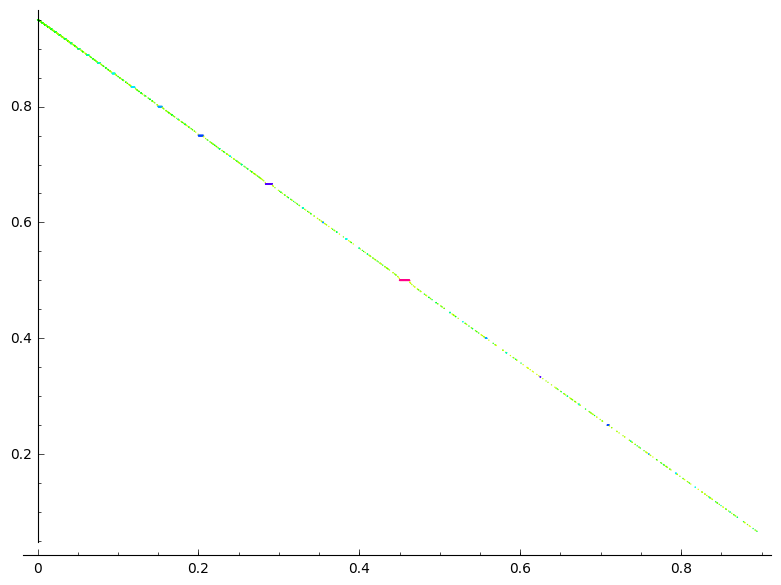

In [112]:
plt = point([])
for x in srange(0,.9,.0001):
    l = arnold(x)
    if l: plt += point([x,l],hue=1/log(1+l.denominator()),size=1)
plt.show()

In [24]:
solve([la+lb+lc == 1,3*la + 2*lb + lc/2==1], [la,lb,lc])

[[la == 3/2*r7 - 1, lb == -5/2*r7 + 2, lc == r7]]

In [25]:
x,y,z = var('x,y,z')
solve([la+lb+lc == 1,x*la + y*lb + z*lc==1], [la,lb,lc])

[[la == ((r8 - 1)*y - r8*z + 1)/(x - y), lb == -((r8 - 1)*x - r8*z + 1)/(x - y), lc == r8]]